# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [114]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

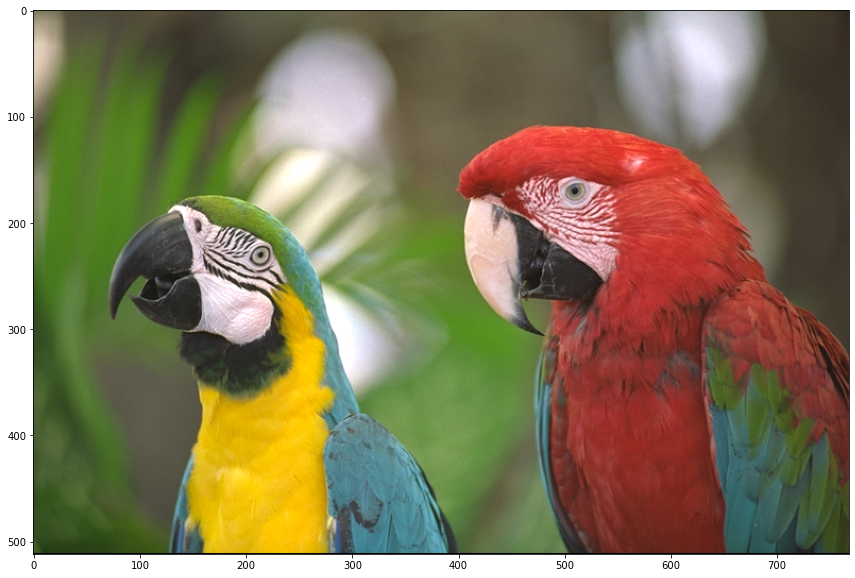

In [115]:
# Load image
img = cv2.imread('imgs/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [116]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [117]:
from tqdm import tqdm

# Cast the image to float  --- why?
# img = img/255

# Prepare for quantization
rows, cols, channels = img.shape

print(f'Rows: {rows}, Cols: {cols}')

quantized = np.zeros_like(img)

R, G, B = 0, 1, 2

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = [colors[np.abs(colors[:, R]-pixel[R]).argmin(),R], 
                     colors[np.abs(colors[:, G]-pixel[G]).argmin(),G],
                    colors[np.abs(colors[:, B]-pixel[B]).argmin(),B]]
        # Apply quantization
        quantized[r, c, :] = new_pixel
print('Quantization done...')

Rows: 512, Cols: 768


100%|██████████| 512/512 [00:03<00:00, 145.08it/s]

Quantization done...


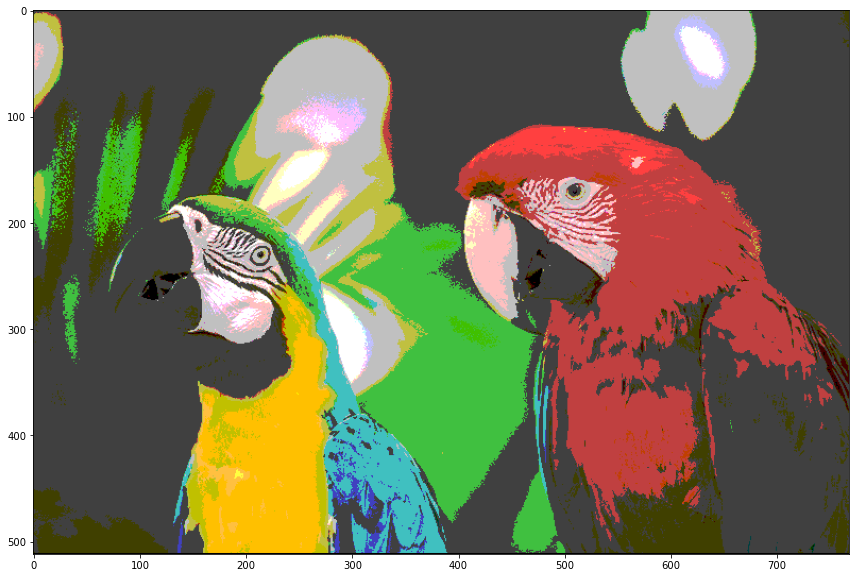

In [118]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

In [119]:
# Compute average quantization error
avg_quant_error = np.average(quantized - img)
print(f'Avg. quantization error: {avg_quant_error}') 

Avg. quantization error: 129.0183859931098


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [120]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = [colors[np.abs(colors[:, R]-pixel[R]).argmin(),R], 
                     colors[np.abs(colors[:, G]-pixel[G]).argmin(),G],
                    colors[np.abs(colors[:, B]-pixel[B]).argmin(),B]]
                
        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c] = new_pixel
        
        img_tmp[r, c + 1, :] = np.clip(img_tmp[r, c + 1, :] + quant_error * 7 / 16, 0, 255)
        img_tmp[r + 1, c + 1, :] = np.clip(img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16, 0, 255)
        img_tmp[r + 1, c, :] = np.clip(img_tmp[r + 1, c, :] + quant_error * 5 / 16, 0, 255)
        img_tmp[r + 1, c - 1, :] = np.clip(img_tmp[r + 1, c - 1, :] + quant_error * 3 / 16, 0, 255)
                
        # Apply dithering
        dithering[r, c, :] = new_pixel

100%|██████████| 510/510 [00:29<00:00, 17.33it/s]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x209ac07fc10>)

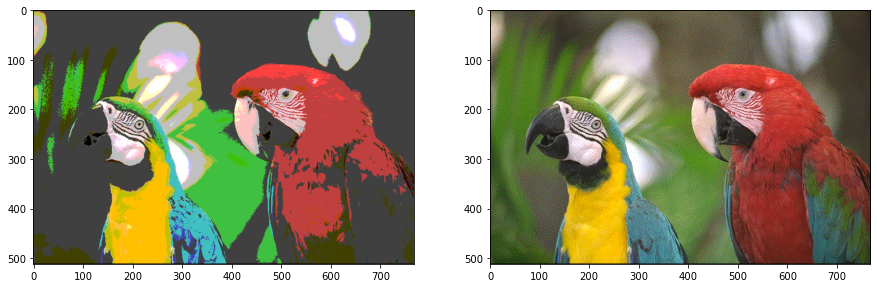

In [121]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

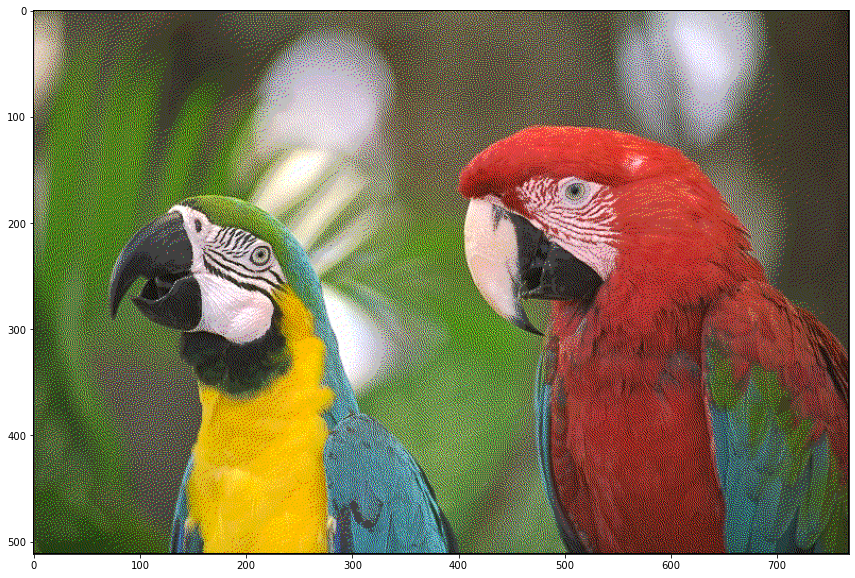

In [122]:
# just an bigger FSD-processed image
plt.imshow(dithering)

In [123]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(dithering - img)
print(avg_dith_error)

135.00601281060113


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

### Answers
* Dithered has higher error
* Dithered looks better
* Run the cell below to see the same in two colors (quantized)

100%|██████████| 512/512 [00:01<00:00, 446.01it/s]

Quantization done...


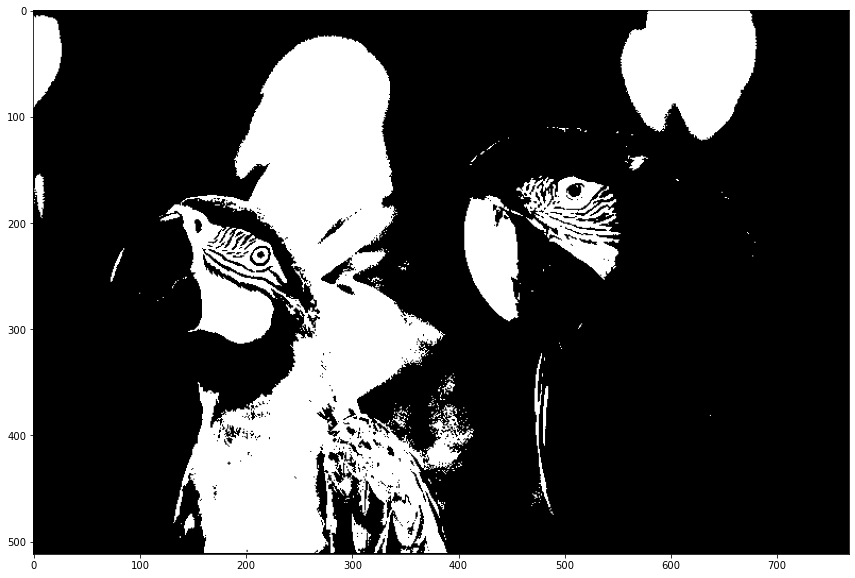

In [124]:
# The copy-paste of the code to show how it looks like in two colors - QUANTIZED version
# This cell is autonomous - it has all the modules (except very common like numpy) included and all the required data inside

from tqdm import tqdm

# Load image
img2cols = cv2.imread('imgs/kodim23.png')
# Convert it to RGB
img2cols = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Black, white
two_colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float  --- why?
# img = img/255

# Prepare for quantization
rows2, cols2 = img2cols.shape

quantized2cols = np.zeros_like(img2cols)

R, G, B = 0, 1, 2

# Apply quantization
for r in tqdm(range(rows2)):
    for c in range(cols2):
        # Extract the original pixel value
        pixel = img2cols[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = two_colors[np.abs(two_colors[:, 0]-pixel).argmin(),0]
        # Apply quantization
        quantized2cols[r, c] = new_pixel
print('Quantization done...')
plt.imshow(quantized2cols, cmap='gray')

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [110]:
from sklearn.cluster import KMeans
print(f'Calculating clusters...')
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 1)))
print(f'Extracting cluster centers...')
colors = kmeans.cluster_centers_
palette = np.msort(colors.round())
print(f'{len(palette)} colors in total')
print(np.reshape(palette, len(palette)))

Calculating clusters...
Extracting cluster centers...
256 colors in total
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 18

100%|██████████| 512/512 [00:04<00:00, 111.36it/s]

Quantization done...
Average quantization error:0.0


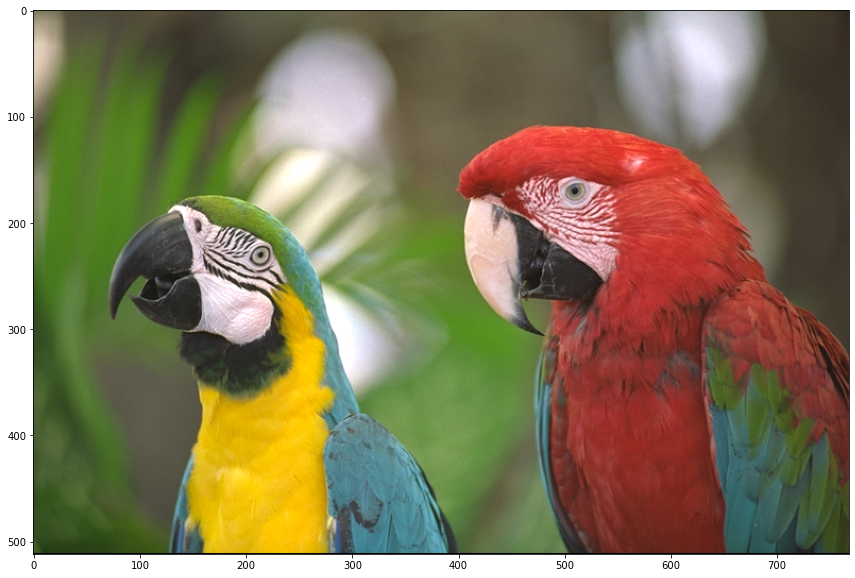

In [112]:
# The copy-paste of Quantization code for custom (optimal) palette

quantized = np.zeros_like(img)

R, G, B = 0, 1, 2

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = [palette[np.abs(palette[:, 0]-pixel[R]).argmin(),0], 
                     palette[np.abs(palette[:, 0]-pixel[G]).argmin(),0],
                    palette[np.abs(palette[:, 0]-pixel[B]).argmin(),0]]
        # Apply quantization
        quantized[r, c, :] = new_pixel
print('Quantization done...')

avg_quant_error = np.average(quantized - img)
print(f'Average quantization error:{avg_quant_error}')

plt.imshow(quantized)

Calculating image...


100%|██████████| 510/510 [00:29<00:00, 17.02it/s]

Average dithering error: 0.7903722127278646


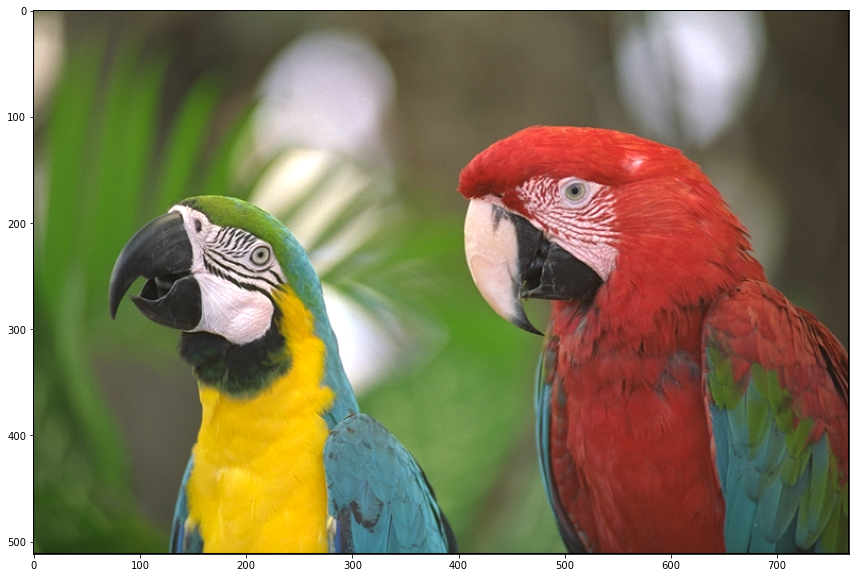

In [113]:
# The copy-paste of Floyd-Steinberg Dithering code for custom (optimal) palette

img_tmp = np.copy(img)
dithering = np.zeros_like(img)

R, G, B = 0, 1, 2

print(f'Calculating image...')
for r in tqdm(range(1, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]         
                      
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = [palette[np.abs(palette[:, 0]-pixel[R]).argmin(),0], 
                     palette[np.abs(palette[:, 0]-pixel[G]).argmin(),0],
                    palette[np.abs(palette[:, 0]-pixel[B]).argmin(),0]]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c] = new_pixel
        
        img_tmp[r, c + 1, :] = np.clip(img_tmp[r, c + 1, :] + quant_error * 7 / 16, 0, 255)
        img_tmp[r + 1, c + 1, :] = np.clip(img_tmp[r + 1, c + 1, :] + quant_error * 1 / 16, 0, 255)
        img_tmp[r + 1, c, :] = np.clip(img_tmp[r + 1, c, :] + quant_error * 5 / 16, 0, 255)
        img_tmp[r + 1, c - 1, :] = np.clip(img_tmp[r + 1, c - 1, :] + quant_error * 3 / 16, 0, 255)
                
        # Apply dithering
        dithering[r, c, :] = new_pixel
        
avg_dith_error = np.average(dithering - img)
print(f'Average dithering error: {avg_dith_error}')

plt.imshow(dithering)

### Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?

### Answers
* The more colors we use the better image we get as a result
* More colors - better image. The quantization error is very similar for 4-8-16-32 colors in the palette
* 256 - it takes a very long time to calculate KMeans clusters. The resulting image is very close to the original:
Quantized image has error = 0, whereas FSD error > 0. I know it should be the same but for some reason, there''s a slight difference.